In [1]:
# Loading packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import ttest_rel
from scipy.stats import kruskal

In [2]:
# Load the DataFrame from the pickle file
df = pd.read_pickle('documents_topics.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57790 entries, 0 to 57789
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      57790 non-null  object 
 1   text                          57790 non-null  object 
 2   created_at                    57790 non-null  object 
 3   campaign_week                 57790 non-null  int64  
 4   process_text_check            57790 non-null  object 
 5   name                          57790 non-null  object 
 6   handle                        57790 non-null  object 
 7   party                         57790 non-null  object 
 8   state_code                    57790 non-null  object 
 9   state_name                    57790 non-null  object 
 10  result_pctg                   57790 non-null  float64
 11  result_votes                  57790 non-null  int64  
 12  position                      57790 non-null  int64  
 13  t

## Test for H2

## Create a dataframe with only that needed data

In [3]:
# Columns you want to include in the new dataset
selected_columns = ['campaign_week', 'name', 'party','Abortion','Campaign Contribution','Campaign Event','Candidate Denigration','Economy Policies',
                    'General Discussion','Homeland Security','Social Protection',
                    'Vote Instigation','position']

# Create a new DataFrame with the selected columns
df_wip = df[selected_columns]
df_wip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57790 entries, 0 to 57789
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   campaign_week          57790 non-null  int64  
 1   name                   57790 non-null  object 
 2   party                  57790 non-null  object 
 3   Abortion               57790 non-null  float64
 4   Campaign Contribution  57790 non-null  float64
 5   Campaign Event         57790 non-null  float64
 6   Candidate Denigration  57790 non-null  float64
 7   Economy Policies       57790 non-null  float64
 8   General Discussion     57790 non-null  float64
 9   Homeland Security      57790 non-null  float64
 10  Social Protection      57790 non-null  float64
 11  Vote Instigation       57790 non-null  float64
 12  position               57790 non-null  int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 5.7+ MB


In [4]:
df_wip_withoutweek = df_wip.drop('campaign_week', axis=1)

In [5]:
#create a dataframe with the values for the algorithms
#transform position into a categorical variable

df_wip_withoutweek['position'] = df_wip_withoutweek['position'].astype('category')

agg_dict = {
    #aggregate the numerical values
    'Abortion': 'mean',
    'Campaign Contribution': 'mean',
    'Campaign Event': 'mean',
    'Candidate Denigration': 'mean',
    'Economy Policies': 'mean',
    'General Discussion': 'mean',
    'Homeland Security': 'mean',
    'Social Protection': 'mean',
    'Vote Instigation': 'mean',
    #now the categorical values
    'party':'last',
    'position':'last'
}


#create the new dataframe
df_wip_withoutweek = df_wip_withoutweek.groupby(['name']).agg(agg_dict).reset_index()
df_wip_withoutweek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   name                   79 non-null     object  
 1   Abortion               79 non-null     float64 
 2   Campaign Contribution  79 non-null     float64 
 3   Campaign Event         79 non-null     float64 
 4   Candidate Denigration  79 non-null     float64 
 5   Economy Policies       79 non-null     float64 
 6   General Discussion     79 non-null     float64 
 7   Homeland Security      79 non-null     float64 
 8   Social Protection      79 non-null     float64 
 9   Vote Instigation       79 non-null     float64 
 10  party                  79 non-null     object  
 11  position               79 non-null     category
dtypes: category(1), float64(9), object(2)
memory usage: 7.2+ KB


In [6]:
df_wip_withoutweek.head(10)

,name,Abortion,Campaign Contribution,Campaign Event,Candidate Denigration,Economy Policies,General Discussion,Homeland Security,Social Protection,Vote Instigation,party,position
0,Adam Laxalt,0.049578,0.084958,0.342772,0.045696,0.152143,0.093715,0.075494,0.088600,0.067043,Rep,2
1,Alex Padilla,0.148523,0.016804,0.273173,0.028421,0.033047,0.050015,0.099010,0.318539,0.032467,Dem,1
2,Bill Redpath,0.065254,0.070680,0.272183,0.012606,0.009168,0.272745,0.051118,0.145613,0.100633,Lib,3
3,Blake Masters,0.070076,0.054812,0.189421,0.061772,0.080312,0.210160,0.160648,0.102759,0.070040,Rep,2
4,Bob McDermott,0.055137,0.007936,0.124874,0.082725,0.157188,0.093628,0.187442,0.128947,0.162124,Rep,2
5,Brian Bengs,0.082369,0.072236,0.290861,0.121740,0.054186,0.111156,0.037133,0.180921,0.049398,Dem,2
6,Catherine Cortez Masto,0.160878,0.055332,0.292362,0.057893,0.020207,0.040531,0.033846,0.286200,0.052751,Dem,1
7,Charles Booker,0.100677,0.279109,0.277463,0.044601,0.020914,0.086212,0.044455,0.107878,0.038692,Dem,2
8,Cheri Beasley,0.105966,0.134473,0.261402,0.044091,0.043107,0.050675,0.032839,0.164861,0.162586,Dem,2
9,Chris Chaffee,0.106928,0.048854,0.147580,0.077308,0.122088,0.126239,0.158946,0.126604,0.085453,Rep,2


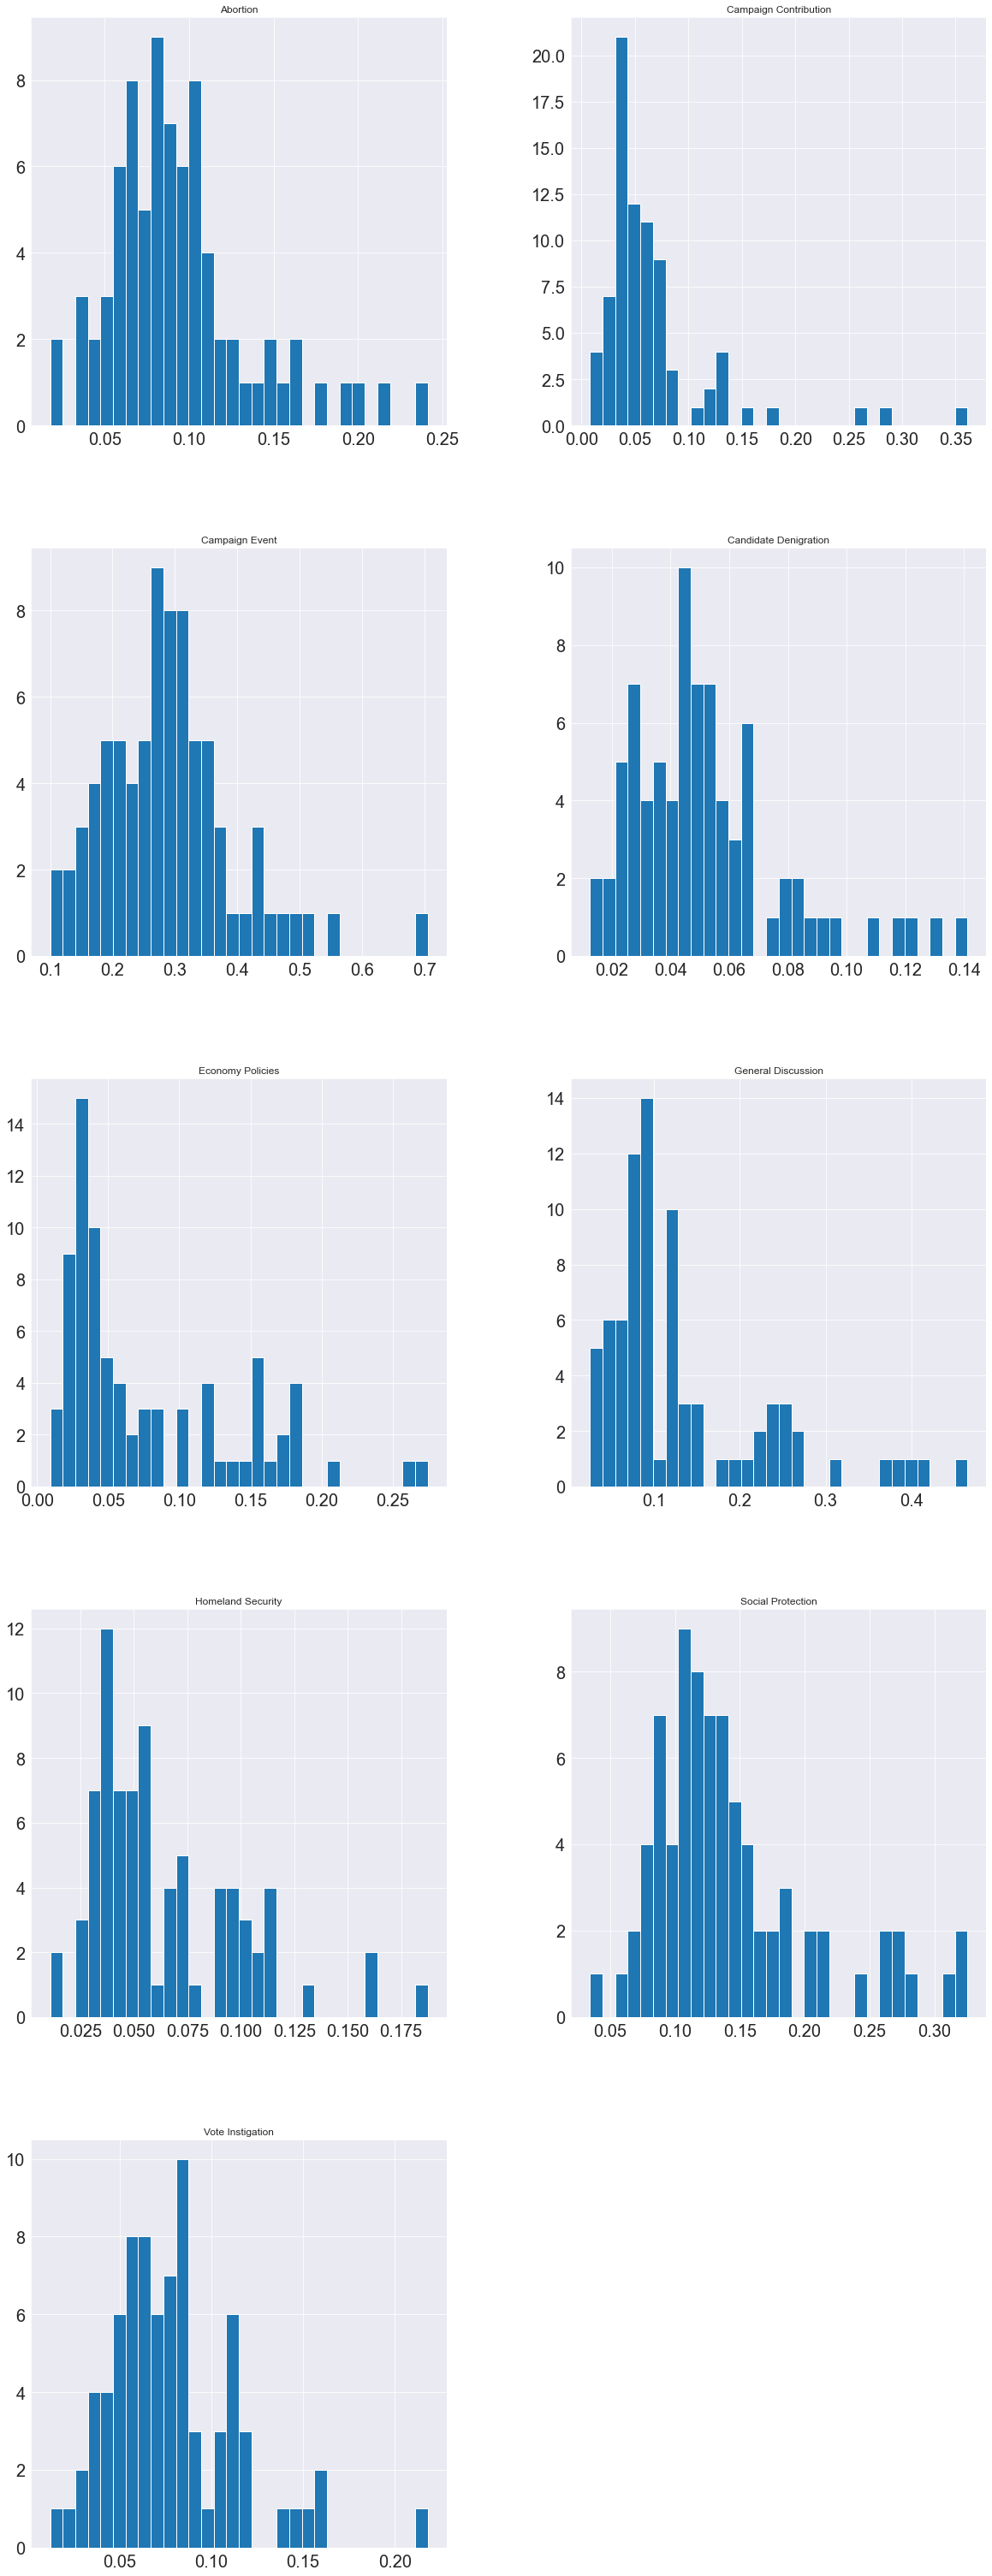

In [17]:
#Explore numerical data
numerical=df_wip_withoutweek.select_dtypes(include=[np.number]).columns.tolist()
fig = df_wip_withoutweek[numerical].hist(bins=30, figsize=(20, 100), layout=(9, 2), xlabelsize=20, ylabelsize=20);

**Descriptive Analysis of Histograms**:
Most of the graphs are right skewed, meaning that most tweets have a low prevalence of each topic, with some outliers existing. Since that the outliers represent an important part of the tweets, we won't remove them in the analysis.

/var/folders/hw/0nn4k6y96p3grs2cw32myzzr0000gn/T/ipykernel_28251/1548659775.py:18: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


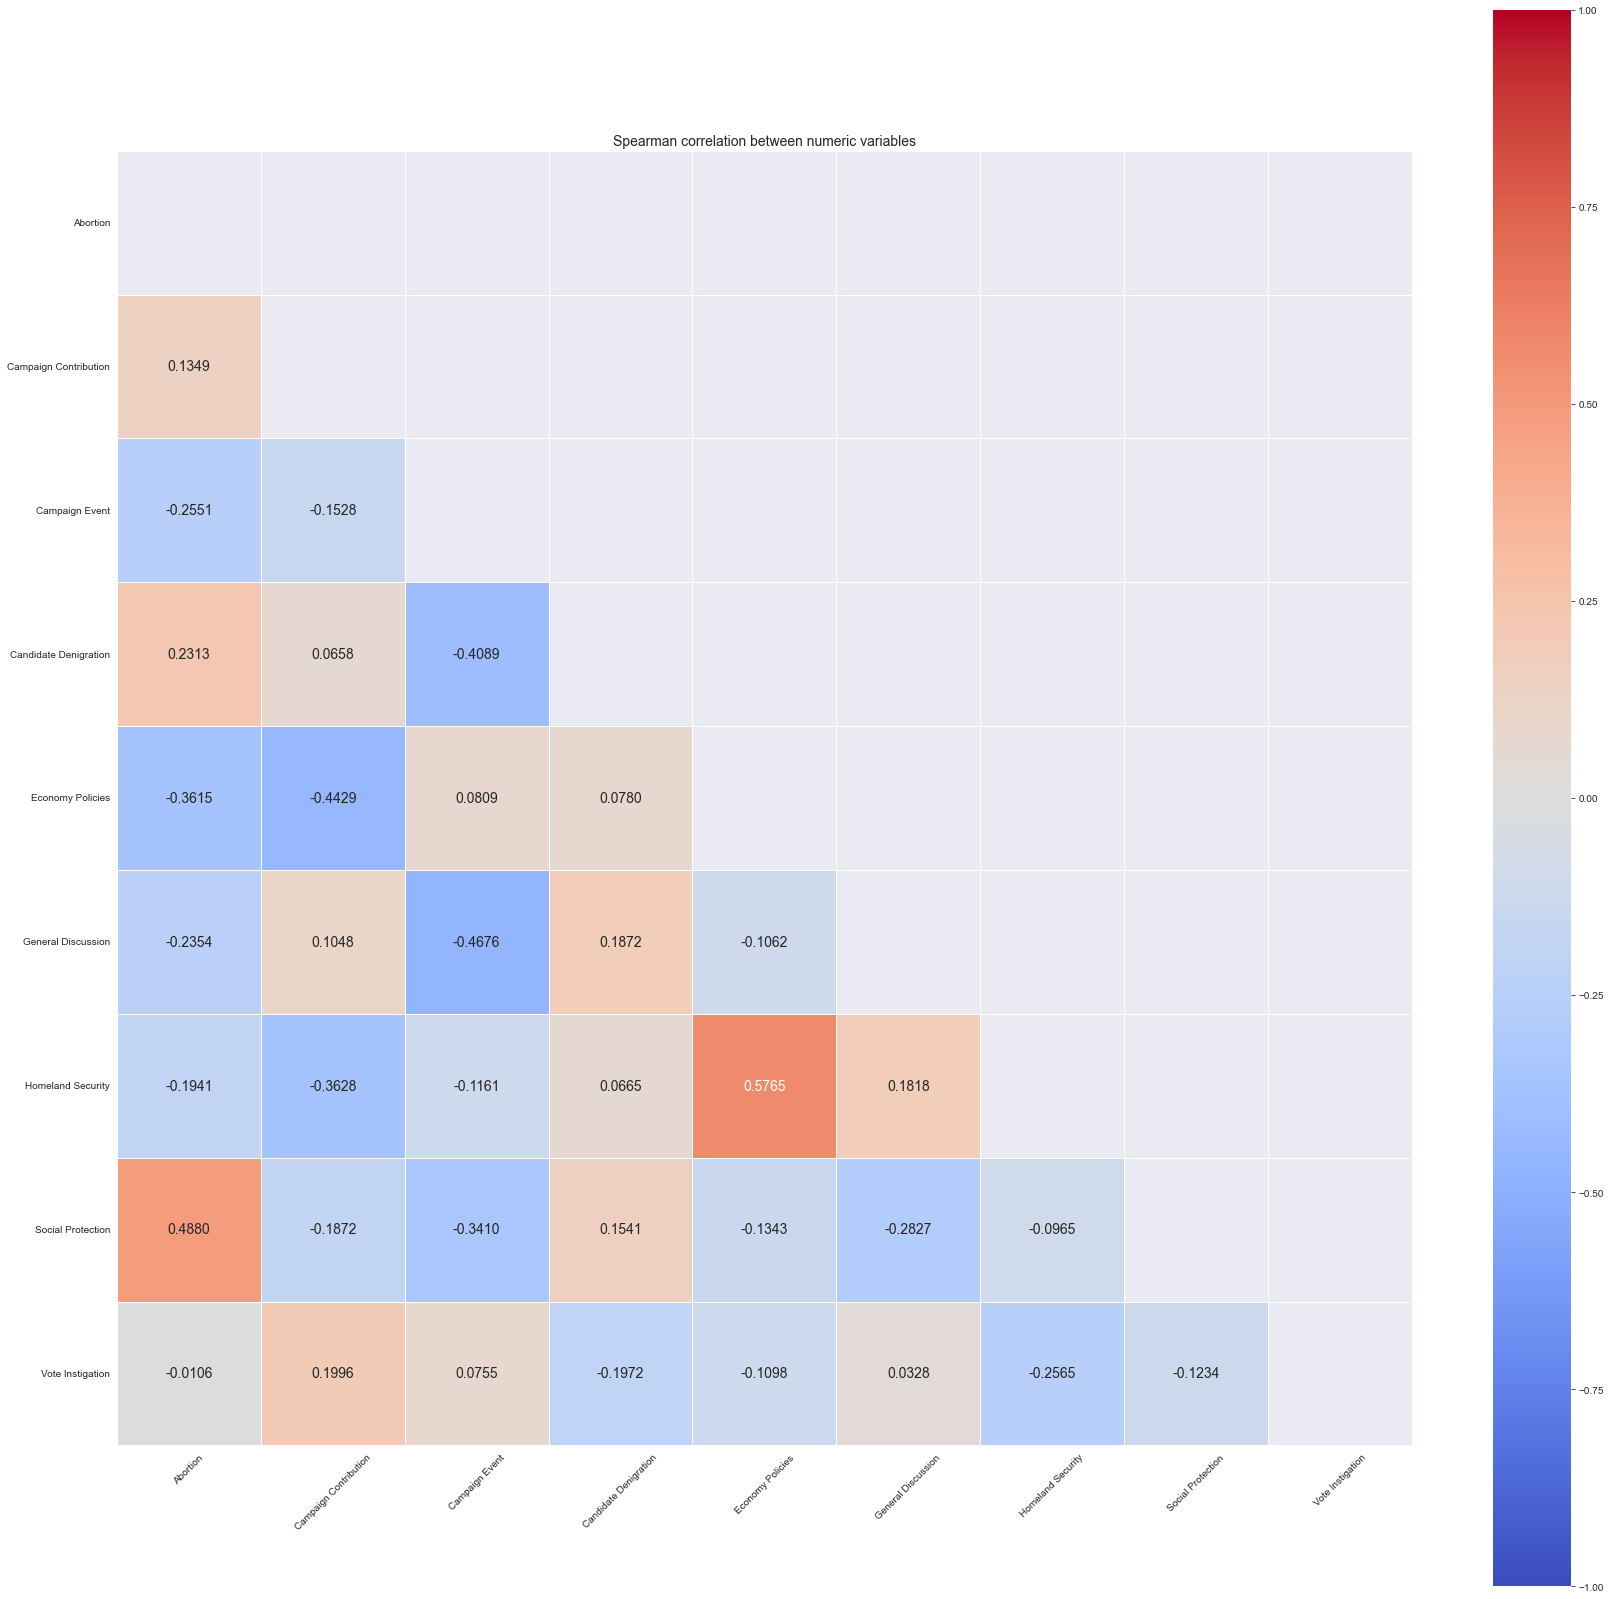

In [9]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 14

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'


# CORRELATION OF ALL NUMERICAL VARIABLES)
numerical=df_wip_withoutweek.select_dtypes(include=[np.number]).columns.tolist()
# Create correlation matrix
corr = df_wip_withoutweek[numerical].corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

# Draw
fig , ax = plt.subplots(figsize=(29,29))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      fmt='.4f',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': heatmaps_text_fontSize})

# Decoration
plt.title("Spearman correlation between numeric variables", fontsize=plots_Title_fontSize)
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 45)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

**Spearman vs Pearson**

Since most of our variables aren't continuous there is no point on doing the Pearson Correlation. With Spearman, we can test the dependence of each variable with our target and see how they behave, knowing that there is no linear relationship.

There are not great (positive or negative correlations), which means that people that tend to tweet in a way doesn't tend to tweet in other way.

In [10]:
df_wip_withoutweek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   name                   79 non-null     object  
 1   Abortion               79 non-null     float64 
 2   Campaign Contribution  79 non-null     float64 
 3   Campaign Event         79 non-null     float64 
 4   Candidate Denigration  79 non-null     float64 
 5   Economy Policies       79 non-null     float64 
 6   General Discussion     79 non-null     float64 
 7   Homeland Security      79 non-null     float64 
 8   Social Protection      79 non-null     float64 
 9   Vote Instigation       79 non-null     float64 
 10  party                  79 non-null     object  
 11  position               79 non-null     category
dtypes: category(1), float64(9), object(2)
memory usage: 7.2+ KB


**calculate similarity based on party (both winners and losers)**

In [11]:
# Create the 'is_winner' column based on the 'position' column
df_wip_withoutweek['is_winner'] = (df_wip_withoutweek['position'] == 1).astype(int)

In [12]:
#since the data is not normalized, we are using kruskal-willis tests
#first let's check for each party, if there is any significant difference between winners and non-winners

# Identify the parties with winners
parties_with_winners = df_wip_withoutweek.loc[df_wip_withoutweek['is_winner'] == 1, 'party'].unique()

# Filter the dataset to include only the parties with winners
filtered_df = df_wip_withoutweek[df_wip_withoutweek['party'].isin(parties_with_winners)]

# Split the dataset by party
parties = filtered_df.groupby('party')

# Compute the mean topic weights for winners and all party members
winner_means = filtered_df.loc[filtered_df['is_winner'] == 1].groupby('party').mean()
#all_means = parties.mean()

# Perform a Kruskal-Wallis test on each topic weight column
results = []
for column in winner_means:
    topic_results = []
    for party in parties_with_winners:
        winner_weight = winner_means.loc[party, column]
        all_weights = parties.get_group(party)[column]
        statistic, p_value = kruskal(all_weights, [winner_weight] * len(all_weights))
        topic_results.append((party, statistic, p_value))
    results.append((column, topic_results))

# Print the results for each topic and party
for result in results:
    print(f"Topic: {result[0]}")
    for party_result in result[1]:
        print(f"  Party: {party_result[0]}\n  Statistic: {party_result[1]}\n  P-Value: {party_result[2]}\n")


Topic: Abortion
  Party: Dem
  Statistic: 11.512726318551552
  P-Value: 0.0006912132545294732

  Party: Rep
  Statistic: 0.43456962911125335
  P-Value: 0.5097551773797553

Topic: Campaign Contribution
  Party: Dem
  Statistic: 2.5072159538178873
  P-Value: 0.11332597908509727

  Party: Rep
  Statistic: 0.0482855143456876
  P-Value: 0.8260739220466717

Topic: Campaign Event
  Party: Dem
  Statistic: 2.5072159538178873
  P-Value: 0.11332597908509727

  Party: Rep
  Statistic: 10.86424072778166
  P-Value: 0.0009803893752667393

Topic: Candidate Denigration
  Party: Dem
  Statistic: 6.191288375754388
  P-Value: 0.012838068844775242

  Party: Rep
  Statistic: 0.0482855143456876
  P-Value: 0.8260739220466717

Topic: Economy Policies
  Party: Dem
  Statistic: 4.14458147467855
  P-Value: 0.0417679793571618

  Party: Rep
  Statistic: 0.0482855143456876
  P-Value: 0.8260739220466717

Topic: General Discussion
  Party: Dem
  Statistic: 14.787457360272878
  P-Value: 0.0001203332092488613

  Party:

In [2]:
import pandas as pd

# The data
data = {
    'Topic': ['Abortion', 'Abortion', 'Campaign Contribution', 'Campaign Contribution', 'Campaign Event', 'Campaign Event', 'Candidate Denigration', 'Candidate Denigration', 'Economy Policies', 'Economy Policies', 'General Discussion', 'General Discussion', 'Homeland Security', 'Homeland Security', 'Social Protection', 'Social Protection', 'Vote Instigation', 'Vote Instigation', 'is_winner', 'is_winner'],
    'Party': ['Dem', 'Rep', 'Dem', 'Rep', 'Dem', 'Rep', 'Dem', 'Rep', 'Dem', 'Rep', 'Dem', 'Rep', 'Dem', 'Rep', 'Dem', 'Rep', 'Dem', 'Rep', 'Dem', 'Rep'],
    'Statistic': [11.51, 0.43, 2.50, 0.04, 2.50, 10.86, 6.19, 0.04, 4.14, 0.04, 14.78, 3.91, 14.78, 0.43, 11.51, 1.20, 4.14, 2.36, 26.27, 18.81],
    'P-Value': [0.00069, 0.50975, 0.11332, 0.82607, 0.11332, 0.00098, 0.01283, 0.82607, 0.04176, 0.82607, 0.00012, 0.04796, 0.00012, 0.50975, 0.00069, 0.27189, 0.04176, 0.12400, 0.00000, 0.00001]
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to assign stars
def assign_stars(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return ''

# Apply function to P-Value column
df['Significance'] = df['P-Value'].apply(assign_stars)

# Add stars to P-Value column
df['P-Value'] = df['P-Value'].astype(str) + df['Significance']

# Drop the Significance column
df = df.drop(columns=['Significance'])

# Print DataFrame
print(df)
df.to_csv("kruskal_wallis_results.csv", index=False)
# Note: *** p<0.001; ** p<0.01; * p<0.05


                    Topic Party  Statistic     P-Value
0                Abortion   Dem      11.51  0.00069***
1                Abortion   Rep       0.43     0.50975
2   Campaign Contribution   Dem       2.50     0.11332
3   Campaign Contribution   Rep       0.04     0.82607
4          Campaign Event   Dem       2.50     0.11332
5          Campaign Event   Rep      10.86  0.00098***
6   Candidate Denigration   Dem       6.19    0.01283*
7   Candidate Denigration   Rep       0.04     0.82607
8        Economy Policies   Dem       4.14    0.04176*
9        Economy Policies   Rep       0.04     0.82607
10     General Discussion   Dem      14.78  0.00012***
11     General Discussion   Rep       3.91    0.04796*
12      Homeland Security   Dem      14.78  0.00012***
13      Homeland Security   Rep       0.43     0.50975
14      Social Protection   Dem      11.51  0.00069***
15      Social Protection   Rep       1.20     0.27189
16       Vote Instigation   Dem       4.14    0.04176*
17       V

In [13]:
# Filter the dataset to include only winners
winners = df_wip_withoutweek.loc[df_wip_withoutweek['is_winner'] == 1]

# Split the dataset by party
parties = winners.groupby('party')

# Get the winning candidates for each party
dem_winners = winners.loc[winners['party'] == 'Dem']
rep_winners = winners.loc[winners['party'] == 'Rep']

# List of topics
topics = ['Abortion', 'Campaign Contribution', 'Campaign Event', 'Candidate Denigration', 'Economy Policies', 'General Discussion', 'Homeland Security', 'Social Protection', 'Vote Instigation']

# Perform a Kruskal-Wallis test for each topic between the parties
results = []
for topic in topics:
    dem_topic = dem_winners[topic]
    rep_topic = rep_winners[topic]
    statistic, p_value = kruskal(dem_topic, rep_topic)
    dem_mean = np.mean(dem_topic)
    rep_mean = np.mean(rep_topic)
    results.append((topic, statistic, p_value, dem_mean, rep_mean))

# Print the results for each topic
for result in results:
    print(f"Topic: {result[0]}\n  Statistic: {result[1]}\n  P-Value: {result[2]}\n  Dem Mean: {result[3]}\n  Rep Mean: {result[4]}\n")


Topic: Abortion
  Statistic: 15.63551020408164
  P-Value: 7.679876770167506e-05
  Dem Mean: 0.14421559391599548
  Rep Mean: 0.0702180197259534

Topic: Campaign Contribution
  Statistic: 2.9399999999999977
  P-Value: 0.08641073297370006
  Dem Mean: 0.061121767601402095
  Rep Mean: 0.04163813457561534

Topic: Campaign Event
  Statistic: 4.408163265306129
  P-Value: 0.03576733242200861
  Dem Mean: 0.2745044854277309
  Rep Mean: 0.3517863943322096

Topic: Candidate Denigration
  Statistic: 0.960000000000008
  P-Value: 0.3271868777903008
  Dem Mean: 0.05476214154163991
  Rep Mean: 0.04660726602344546

Topic: Economy Policies
  Statistic: 19.439999999999998
  P-Value: 1.0380993840042325e-05
  Dem Mean: 0.03991888188405356
  Rep Mean: 0.1325203340099058

Topic: General Discussion
  Statistic: 4.860000000000014
  P-Value: 0.027486336111510107
  Dem Mean: 0.06005226677435095
  Rep Mean: 0.08983795063534349

Topic: Homeland Security
  Statistic: 7.260000000000019
  P-Value: 0.007050729110422691


## Results break-down

Based on these results, we can say that many topics have significant difference between winners and loosers, and winners speak differently between parties. Although some results may confirm the H2, the majority of the tests reject it.